# MMA 867 - Individual Assignment - 2

## Predicting Music Records Popularity

## By Gopala Goyal - 20254605

> As a part of the assignment, we would be working on the music dataset and predicting if a song would reach the Top 10 list of music in the world

> We are provided with a dataset that contains about 38 independent variables and 1 categorical target variable. As the target variable is categorical, we would be performing logistic regression and calculating the probability that the song would reach the Top 10 list or not

> There is no training set provided, hence we would be splitting the training data into training and testing data. 
(Optional)The training data would be split into training and validation data to ensure that the model that has been created can be validated and re-iterated if required.

> The high level process for the analysis would be:
> 1. Collecting, gathering and importing data
> 2. Performing Exploratory Data Analysis (EDA) where we see what the data is and how it is structured, and check for any discrepancies in the data
> 3. Data Wrangling Process - Clean, structure and prepare data for predictive analysis
> 4. Developing logistic regression model to get the probabilities for test data
> 5. Reporting outcomes

In [44]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib as mplt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, scale, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn import model_selection
import statsmodels.api as sm
%matplotlib inline

In [4]:
#Import the dataset
music_data = pd.read_csv("MusicData.csv", encoding = "ISO-8859-1")
music_data.head()

,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
0,2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,...,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
1,2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,...,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2,2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,...,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
3,2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,...,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
4,2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,...,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0


In [3]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7574 entries, 0 to 7573
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      7574 non-null   int64  
 1   songtitle                 7574 non-null   object 
 2   artistname                7574 non-null   object 
 3   songID                    7574 non-null   object 
 4   artistID                  7574 non-null   object 
 5   timesignature             7574 non-null   int64  
 6   timesignature_confidence  7574 non-null   float64
 7   loudness                  7574 non-null   float64
 8   tempo                     7574 non-null   float64
 9   tempo_confidence          7574 non-null   float64
 10  key                       7574 non-null   int64  
 11  key_confidence            7574 non-null   float64
 12  energy                    7574 non-null   float64
 13  pitch                     7574 non-null   float64
 14  timbre_0

In [4]:
music_data.describe()

,year,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
count,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,...,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000
mean,2001.455902,3.893979,0.853307,-8.817262,107.348267,0.622866,5.384605,0.433843,0.675471,0.010817,...,95.653221,-63.703984,50.057489,-59.515016,68.028067,-87.340055,55.520722,-50.868457,47.490774,0.147742
std,5.815223,0.532561,0.243748,4.377079,24.665030,0.304656,3.572579,0.273826,0.243473,0.013671,...,26.859726,15.970244,14.463524,17.190527,20.381321,30.464274,23.549473,11.701530,12.463966,0.354868
min,1990.000000,0.000000,0.000000,-42.451000,0.000000,0.000000,0.000000,0.000000,0.000020,0.000000,...,15.699000,-158.756000,-25.955000,-149.507000,8.415000,-208.819000,-6.359000,-145.599000,7.200000,0.000000
25%,1997.000000,4.000000,0.819250,-10.847000,88.860250,0.372000,2.000000,0.204000,0.500138,0.003000,...,76.498000,-73.050750,40.584500,-70.282500,53.037250,-105.130250,39.196000,-58.058000,38.975250,0.000000
50%,2002.000000,4.000000,0.979000,-7.649000,103.268000,0.701500,6.000000,0.451500,0.718160,0.007000,...,94.632500,-62.661500,49.220000,-58.650000,65.935000,-83.074000,50.895000,-50.892500,46.437500,0.000000
75%,2006.000000,4.000000,1.000000,-5.640000,124.800500,0.892000,9.000000,0.646000,0.887396,0.014000,...,112.708250,-52.982750,58.462000,-47.699750,81.267000,-64.518000,66.593000,-43.292250,55.030250,0.000000
max,2010.000000,7.000000,1.000000,1.305000,244.307000,1.000000,11.000000,1.000000,0.998492,0.541000,...,214.819000,-2.382000,144.985000,1.140000,161.518000,-10.640000,192.417000,-6.497000,110.272000,1.000000


> It is a time series data and would be split into training data and testing data on the basis of years

In [56]:
from scipy.stats import skew
inx = music_data.dtypes[music_data.dtypes != object].index
skewed_features = music_data[inx].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

## Exploratory Data Analysis

<AxesSubplot:>

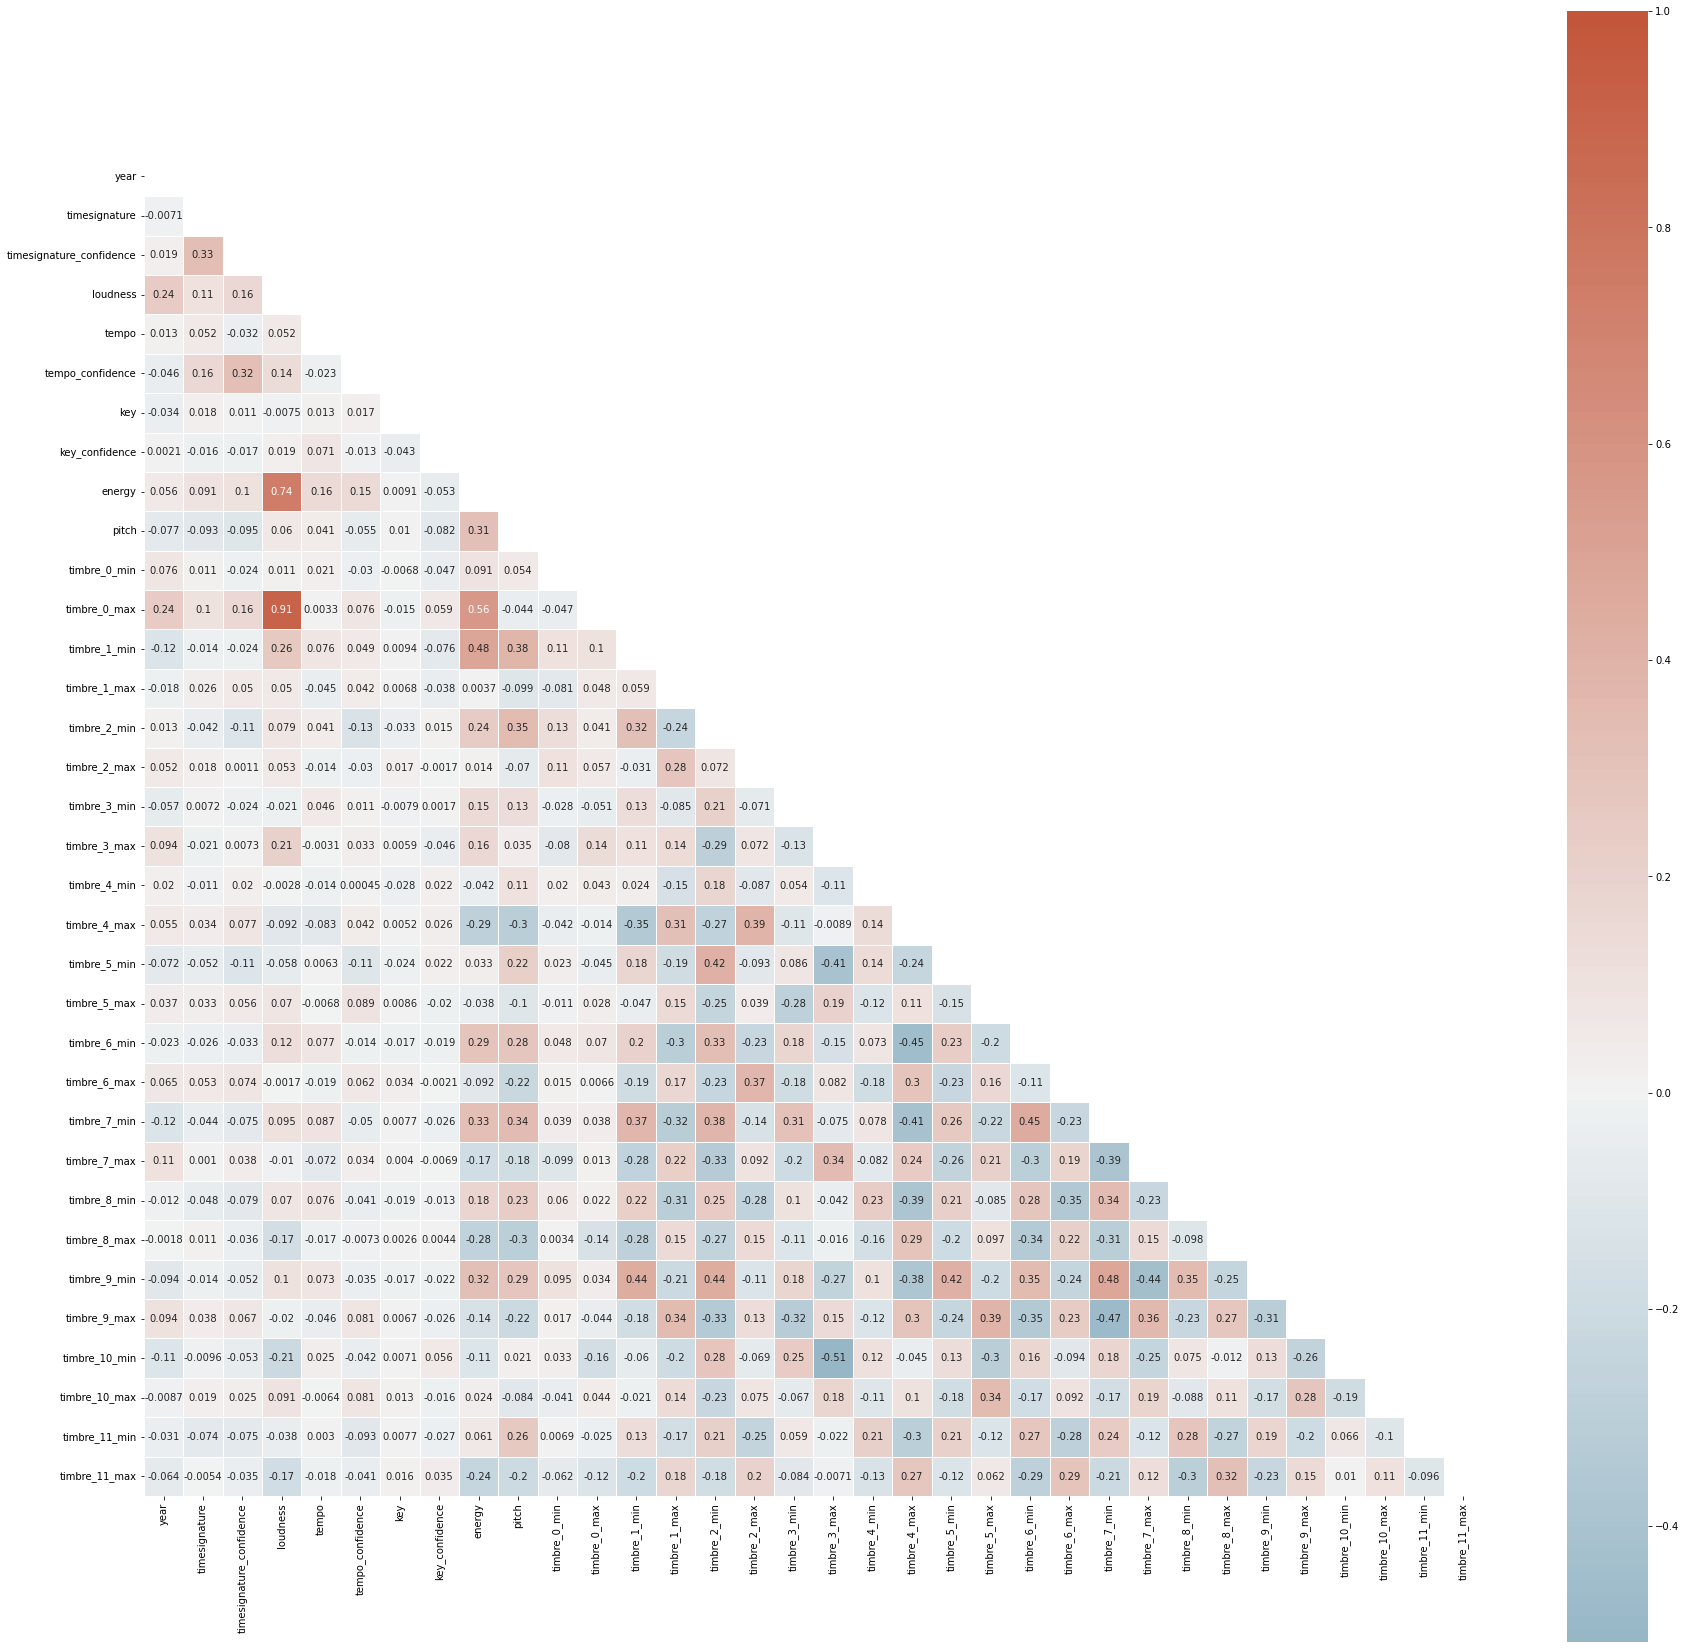

In [5]:
plt.figure(figsize = (30,30))
corr_matrix = music_data.corr()
mask = np.triu(np.ones_like(corr_matrix.iloc[:-1,:-1], dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix.iloc[:-1,:-1],mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5)

> Looking at the above correlation matrix between the independent variables, we can see that the variables are not highly correlated, hence would not cause issues in the model fitting.

> However, the variables would need to be reduced. We would be practicing the concept of PCA to reduce the dimentionality of the variables, however, due to the less colliearity between the variables, we might not implement PCA

## Data Transformation

In [8]:
#Copy the target variable into a Series
Top10 = music_data['Top10']

In [9]:
#Drop the target variable from the training dataset
music_data  = music_data.drop('Top10', axis = 1)

In [10]:
#Drop the string variables that are not required and can cause bias in the result
music_data  = music_data.drop(['songtitle','artistname','songID','artistID'], axis = 1)

In [11]:
#Check the shape of the dataframe
music_data.shape

(7574, 34)

In [12]:
## Defined a general function that performs scaling and applies PCA
#Application of PCA on the dataset
#PCA requires the data to be scaled - we create a set of operations before we apply the dimentionality reduction
#Create an object of PCA and then perform PCA on transformed/scaled data
#Create a datafram e of the PCA fit data and print the results
def perform_scaling(x):
    scaler = MinMaxScaler()
    data_rescaled = scaler.fit_transform(x)
    return data_rescaled

def perform_pca(x,compon):
    pca = PCA(n_components = compon)
    reduced_data = pca.fit_transform(x)
    reduced_data = pd.DataFrame(reduced_data)
    print(reduced_data.shape)
    print(reduced_data)
    print(pd.DataFrame(pca.components_.T).loc[:4,:5])
    return reduced_data, pca   

In [13]:
#Calling the Scaling and PCA fitting function to perform the required task
music_reduced_data, pca = perform_pca(perform_scaling(music_data), None)

(7574, 34)
            0         1         2         3         4         5         6   \
0    -0.455966 -0.323965  0.238063  0.538802  0.214388 -0.002267  0.213096   
1    -0.587730 -0.117037  0.159438  0.543253  0.170842 -0.136244  0.061213   
2    -0.000862 -0.128829 -0.426476  0.546368 -0.132167  0.071234 -0.172783   
3    -0.231778 -0.038115 -0.595529  0.378633  0.203767 -0.143092 -0.003026   
4     0.161475  0.029590 -0.016947  0.604598  0.130076 -0.103678 -0.084151   
...        ...       ...       ...       ...       ...       ...       ...   
7569 -0.038973 -0.485271 -0.077974 -0.547372  0.299660 -0.350682 -0.101394   
7570  0.219371 -0.234602  0.478505 -0.214661 -0.397920 -0.156805 -0.423780   
7571  0.146189 -0.289171 -0.178242 -0.459009 -0.486716  0.003315 -0.207502   
7572 -0.258335 -0.453127  0.262880 -0.279733  0.000917 -0.551033  0.000511   
7573 -0.199333 -0.467916  0.045486 -0.273200 -0.403037 -0.331785 -0.082700   

            7         8         9   ...        24   

In [14]:
# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

Eigenvalues:
[0.11621447 0.1093033  0.1059998  0.09161019 0.07580785 0.06651212
 0.04737946 0.03559002 0.03101179 0.02866891 0.02154049 0.01980808
 0.01669072 0.01507745 0.0136658  0.01270245 0.011879   0.01046033
 0.01011174 0.0092326  0.00897068 0.00876076 0.00828248 0.00692383
 0.00657346 0.00572219 0.00548519 0.00512999 0.00486195 0.00480456
 0.00407376 0.00373158 0.00045599 0.00041039]



In [15]:
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[12.5847684  11.8363632  11.47863038  9.92039163  8.2091693   7.20254187
  5.13068259  3.85401321  3.35824047  3.10453252  2.33260193  2.14500105
  1.80742423  1.63272468  1.47985834  1.37553771  1.2863669   1.13274
  1.09499244  0.99979102  0.97142772  0.94869551  0.896903    0.74977553
  0.71183484  0.6196509   0.59398623  0.55552254  0.52649705  0.52028224
  0.44114425  0.40408939  0.04937847  0.04444044]



In [16]:
#Calculate the sum of the variance ratio and then choose the number of PCAs to be used 
#for the Logistic Regression model
sum(pca.explained_variance_ratio_[:15])

0.8607694379927547

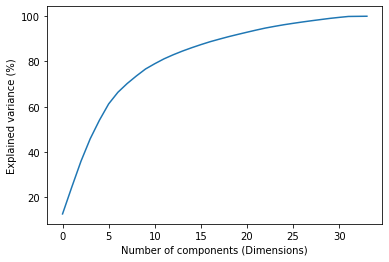

In [17]:
# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")
plt.show()

> Now, we get the transformed dataset with 15 components. For this, we need to run PCA again by setting n_components=15

> The dataset has been transformed using the PCA technique
> 1. There were about 34 variables initially, now they have been reduced to 15
> 2. There is no correlation between any of the independent variables anymore, this is because PCA has transformed the set of correlated variables in the original dataset into a set of uncorrelated variables. 
> 3. The corresponding values of the two datasets are completely different.
> 4. The dataset now covers about 86.07% variance in the dataset

## Modelling

> We would be performing Logistic Regression on the initial dataset first to check what is the model accuracy

> After this, we would used the scaled and PCA transformed dataset and perform the Logistic Regression and compare the model accuracy

In [18]:
#Create a generalized function to perform Logistic Regression, Generate Accuracy estimates and create a confusion matrix

def run_logistic_regression(X_train_f,X_test_f,y_train_f,y_test_f):
    clf = LogisticRegression()
    clf.fit(X_train_f, y_train_f)
    y_pred = clf.predict(X_test_f) # Predictions
    y_true = y_test_f # True values
    print("Train accuracy:", np.round(accuracy_score(y_train_f, clf.predict(X_train_f)), 4))
    print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 4))
    cf_matrix = metrics.confusion_matrix(y_true, y_pred)
    print("\nTest confusion_matrix")
    sns.heatmap(cf_matrix, annot=True,fmt="5", cmap='Greens')
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('True', fontsize=12)
    return clf

## Answer 1, 2, 3 - Modelling the entire dataset, Predicting Popularity, ROC

In [93]:
#Split the original music data into testing and training dataset

X_train_all = music_data[music_data['year']<2010]
X_test_all = music_data[music_data['year']>=2010]
y_train_all = Top10[X_train_all.index]
y_test_all = Top10[X_test_all.index]

Train accuracy: 0.8579
Test accuracy: 0.8686

Test confusion_matrix


/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


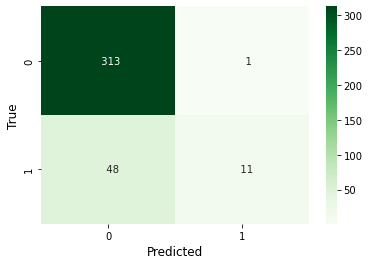

In [94]:
clf = run_logistic_regression(X_train_all,X_test_all,y_train_all,y_test_all)

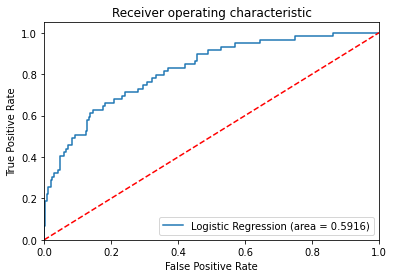

In [96]:
#Generate ROC Curve

logit_roc_auc_all = metrics.roc_auc_score(y_test_all, clf.predict(X_test_all))
fpr, tpr, thresholds = metrics.roc_curve(y_test_all, clf.predict_proba(X_test_all)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc_all)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Question 3, 4, 5

### Do we need to apply PCA?
> In my opinion, we need not apply PCA in the model because the variables are not correlated

In [29]:
#X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(music_data,Top10, shuffle = False, test_size=0.25)
# Split the dataset into training dataset and testing dataset
X_train_pca = music_data[music_data['year']<2010]
X_test_pca = music_data[music_data['year']>=2010]
y_train_pca = Top10[X_train_all.index]
y_test_pca = Top10[X_test_all.index]

#### Testing PCA and the corresponding accuracy after applying PCA -> Did not really increase the accuracy of the model

In [30]:
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(X_train_pca)
pca_f = PCA(n_components = 15)
X_train_pca = pca_f.fit_transform(X_train_pca)
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pca_f.transform(X_test_pca)

Train accuracy: 0.8514
Test accuracy: 0.8445

Test confusion_matrix


Text(33.0, 0.5, 'True')

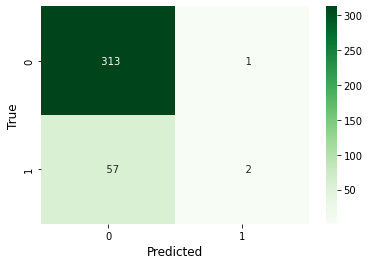

In [31]:
#Run Logistic Regression with L1 penalty (LASSO) on PCA data
clf = LogisticRegression(penalty= 'l1', solver= 'liblinear',random_state=42)
clf.fit(X_train_pca, y_train_pca)
y_pred = clf.predict(X_test_pca) # Predictions
y_true = y_test_pca # True values
print("Train accuracy:", np.round(accuracy_score(y_train_pca, clf.predict(X_train_pca)), 4))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 4))
cf_matrix = metrics.confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True,fmt="5", cmap='Greens')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

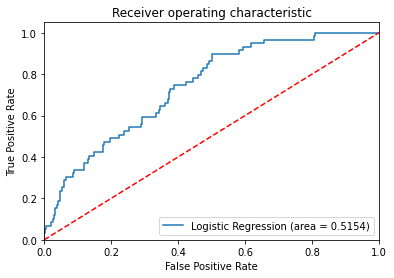

In [32]:
pca_roc_auc = metrics.roc_auc_score(y_test_pca, clf.predict(X_test_pca))
fpr, tpr, thresholds = metrics.roc_curve(y_test_pca, clf.predict_proba(X_test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % pca_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Applied the concept of RFE & Logistic Regression
> In RFE, the algorithm tries to find the best possible features by recursively applying the specified regression/Algo

> We tried to get the best available features from the dataset and then executed the 

In [82]:
#X_train_poc,X_test_poc,y_train_poc,y_test_poc = train_test_split(music_data,Top10, shuffle = False, test_size=0.25)
X_train_poc = music_data[music_data['year']<2010]
X_test_poc = music_data[music_data['year']>=2010]
y_train_poc = Top10[X_train_poc.index]
y_test_poc = Top10[X_test_poc.index]

In [100]:
#Run logistic regression with L1 penalty
LR_model = LogisticRegression(penalty = 'l1', solver='liblinear')
LR_model.fit(X_train_poc, y_train_poc)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
#Run RFE to select the best variables

RFE_model = RFE(LR_model)
RFE_model = RFE_model.fit(X_train_poc, y_train_poc)
selected_columns = X_train_poc.columns[RFE_model.support_]

In [102]:
selected_columns

Index(['timesignature', 'timesignature_confidence', 'loudness',
       'tempo_confidence', 'key', 'key_confidence', 'energy', 'pitch',
       'timbre_0_min', 'timbre_0_max', 'timbre_4_min', 'timbre_4_max',
       'timbre_6_min', 'timbre_10_min', 'timbre_10_max', 'timbre_11_min',
       'timbre_11_max'],
      dtype='object')

In [103]:
# 
logit_model=sm.Logit(y_train_poc,X_train_poc[selected_columns])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.345632
         Iterations 8
                               Results: Logit
Model:                  Logit               Pseudo R-squared:    0.173      
Dependent Variable:     Top10               AIC:                 5011.7984  
Date:                   2021-09-07 19:45    BIC:                 5128.7920  
No. Observations:       7201                Log-Likelihood:      -2488.9    
Df Model:               16                  LL-Null:             -3008.8    
Df Residuals:           7184                LLR p-value:         3.5050e-211
Converged:              1.0000              Scale:               1.0000     
No. Iterations:         8.0000                                              
----------------------------------------------------------------------------
                          Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------------
times

In [104]:
selected_columns.drop(['energy'])

Index(['timesignature', 'timesignature_confidence', 'loudness',
       'tempo_confidence', 'key', 'key_confidence', 'pitch', 'timbre_0_min',
       'timbre_0_max', 'timbre_4_min', 'timbre_4_max', 'timbre_6_min',
       'timbre_10_min', 'timbre_10_max', 'timbre_11_min', 'timbre_11_max'],
      dtype='object')

In [105]:
logreg = LogisticRegression(penalty = 'l1', solver='liblinear')
logreg.fit(X_train_poc[selected_columns], y_train_poc)

LogisticRegression(penalty='l1', solver='liblinear')

In [106]:
y_pred_rfe = logreg.predict(X_test_poc[selected_columns])
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test_poc[selected_columns], y_test_poc)))

Accuracy of logistic regression classifier on test set: 0.8606



Test confusion_matrix


Text(33.0, 0.5, 'True')

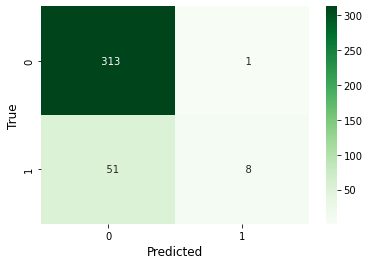

In [107]:
cf_matrixx = metrics.confusion_matrix(y_test_poc, y_pred_rfe)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrixx, annot=True,fmt="5", cmap='Greens')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

### ROC Curve

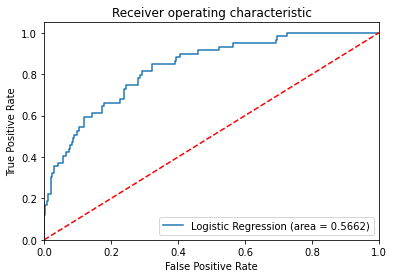

In [108]:
logit_roc_auc = metrics.roc_auc_score(y_test_poc, logreg.predict(X_test_poc[selected_columns]))
fpr, tpr, thresholds = metrics.roc_curve(y_test_poc, logreg.predict_proba(X_test_poc[selected_columns])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [109]:
print("Accuracy:",metrics.accuracy_score(y_test_poc, y_pred_rfe))
print("Precision:",metrics.precision_score(y_test_poc, y_pred_rfe))
print("Recall:",metrics.recall_score(y_test_poc, y_pred_rfe))

Accuracy: 0.8605898123324397
Precision: 0.8888888888888888
Recall: 0.13559322033898305
